In [1]:
%matplotlib inline
import sklearn
from tqdm import tqdm
import sed_eval
import os
import milsed
import pumpp
import numpy as np
import jams
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pumpp
import scipy

Using TensorFlow backend.


In [53]:
OUTPUT_PATH = '/home/js7561/dev/milsed/models/resources/'
fid = "Y-3exNVlj92w_30.000_40.000"
version = '190cd92.0'
pump = pickle.load(open(os.path.join(OUTPUT_PATH, 'pump.pkl'), 'rb'))

weight_path = os.path.join(OUTPUT_PATH, version, 'model.h5')
params = json.load(open(os.path.join(OUTPUT_PATH, version, 'params.json'), 'r'))
model, inputs, outputs = milsed.models.MODELS[params['modelname']](pump, alpha=1.0)
model.load_weights(weight_path)

# Load test data
pumpfolder = '/beegfs/js7561/datasets/dcase2017/task4_official/combined/features_silence/'
pumpfile = os.path.join(pumpfolder, fid + '.h5')
dpump = milsed.utils.load_h5(pumpfile)
datum = dpump['mel/mag']
ytrue = dpump['static/tags'][0]

# Predict
output_d, output_s = model.predict(datum)

In [16]:
output_d.shape

(1, 430, 17)

In [17]:
pred = output_d[0]
pred.shape

(430, 17)

(0, 1)

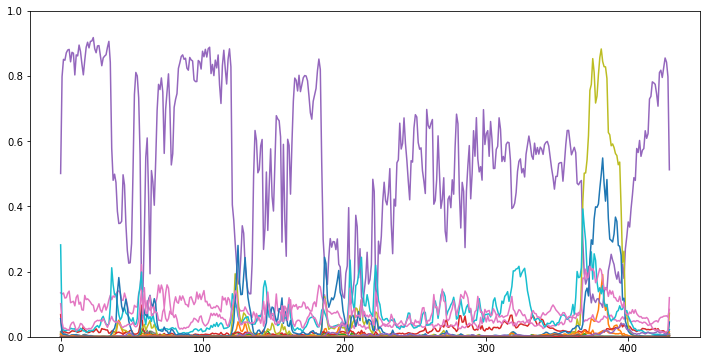

In [18]:
fig = plt.figure(figsize=(12,6))
plt.plot(pred)
plt.ylim([0, 1])

In [38]:
interp = scipy.interpolate.interp1d(np.arange(pred.shape[0]) * 1024/44100., pred.T, kind='linear', 
                                    bounds_error=False, fill_value=pred[-1])

In [39]:
pred_interp = interp(np.arange(860) * 512/44100.).T

In [40]:
pred_interp.shape

(860, 17)

(0, 1)

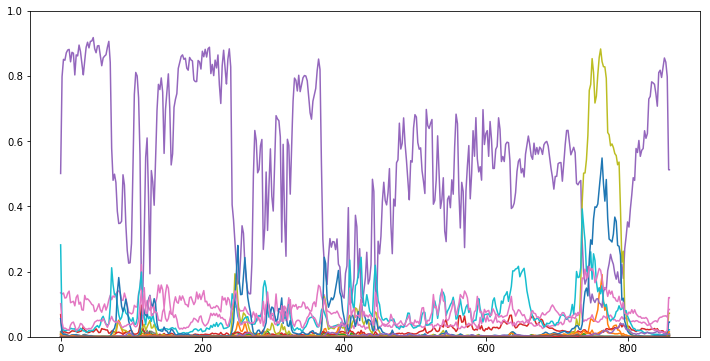

In [41]:
fig = plt.figure(figsize=(12,6))
plt.plot(pred_interp)
plt.ylim([0, 1])

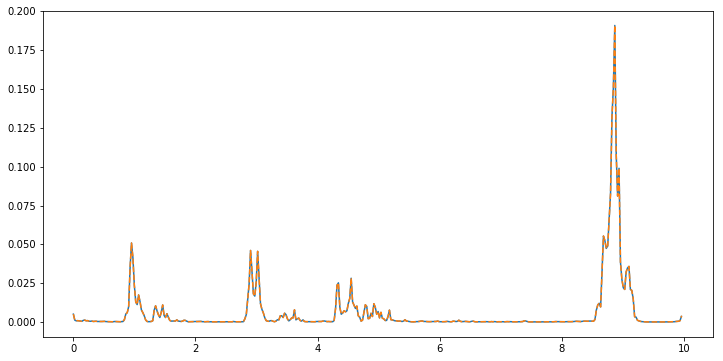

In [42]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.arange(430) * 1024/44100., pred[:, 1])
plt.plot(np.arange(860) * 512/44100., pred_interp[:, 1], '--')

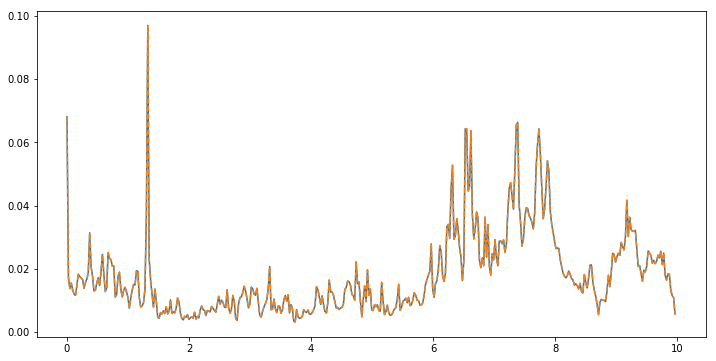

In [43]:
index = 3
fig = plt.figure(figsize=(12,6))
plt.plot(np.arange(430) * 1024/44100., pred[:, index])
plt.plot(np.arange(860) * 512/44100., pred_interp[:, index], '--')

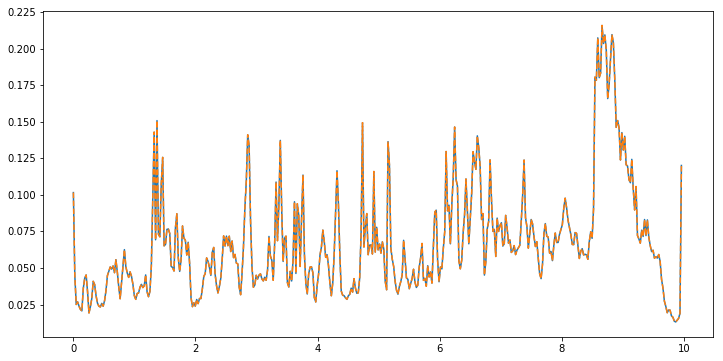

In [44]:
index = 16
fig = plt.figure(figsize=(12,6))
plt.plot(np.arange(430) * 1024/44100., pred[:, index])
plt.plot(np.arange(860) * 512/44100., pred_interp[:, index], '--')

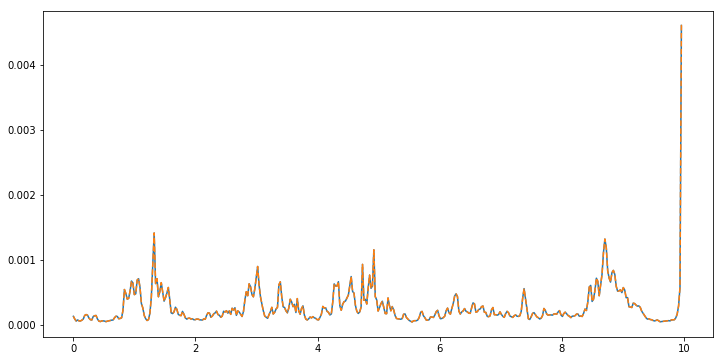

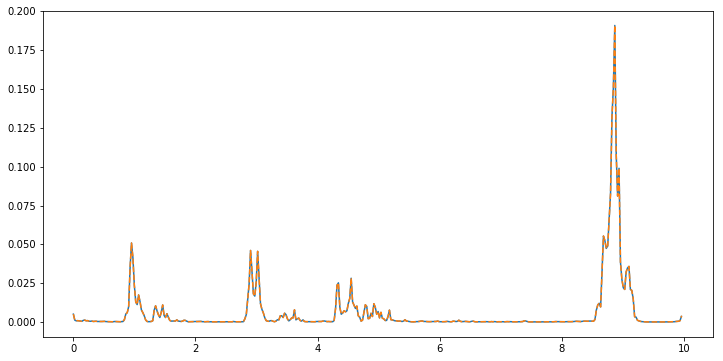

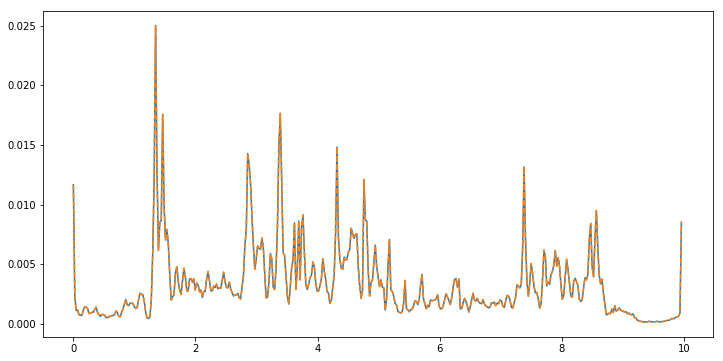

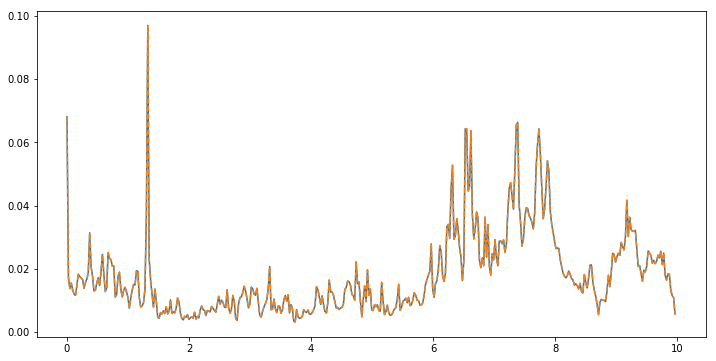

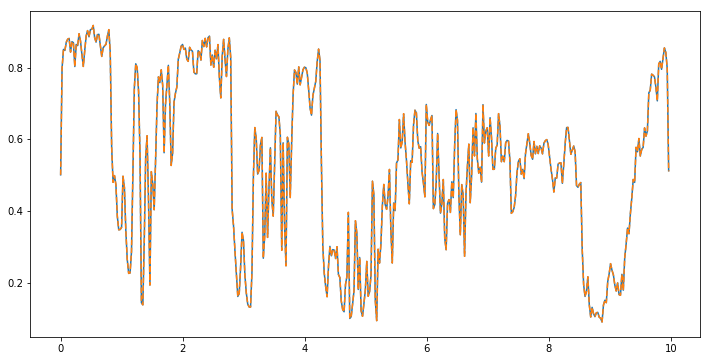

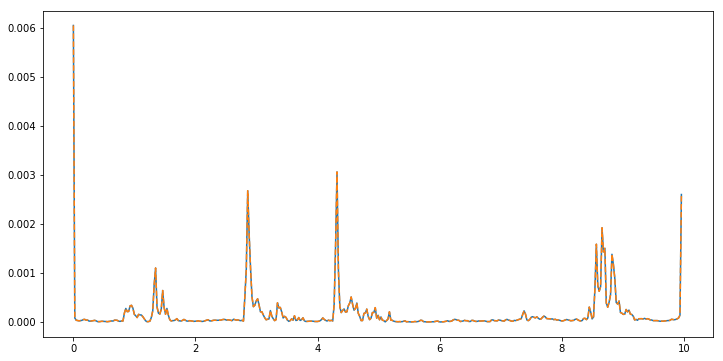

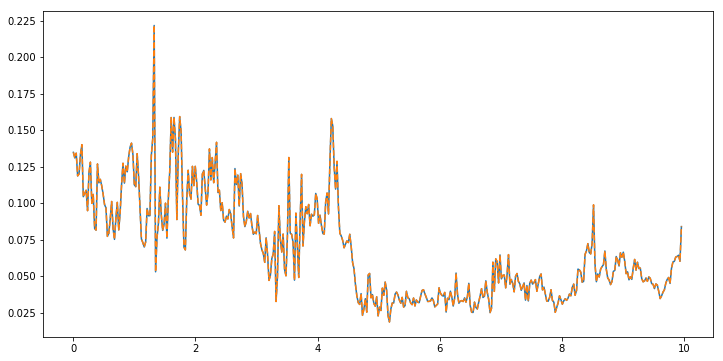

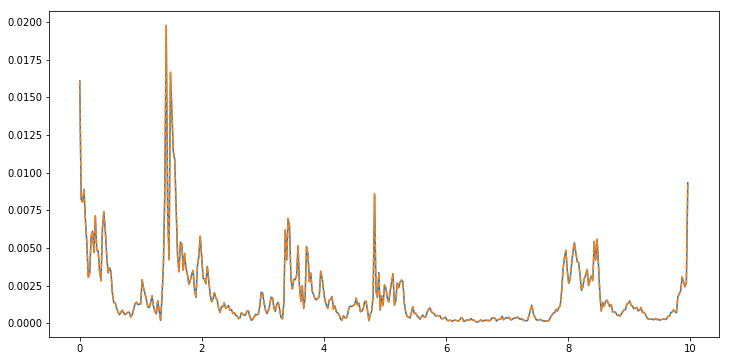

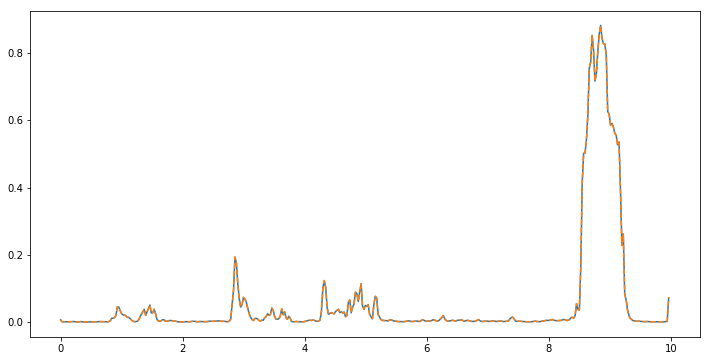

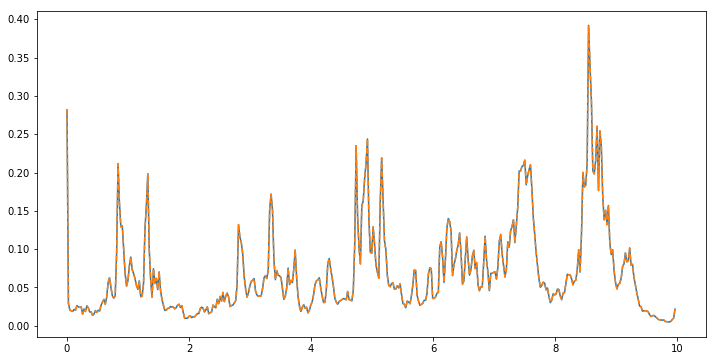

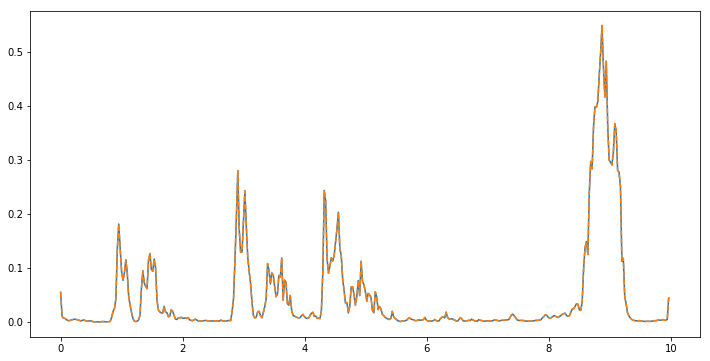

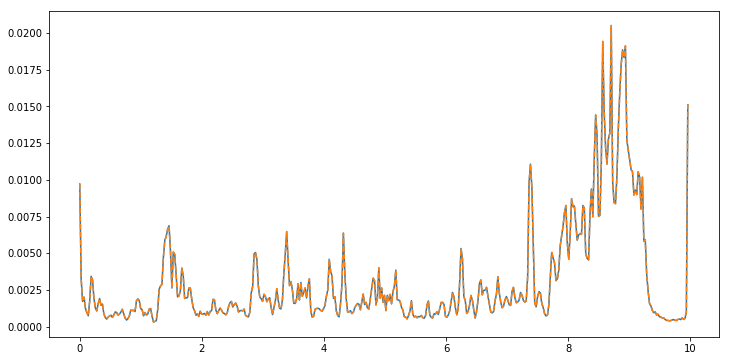

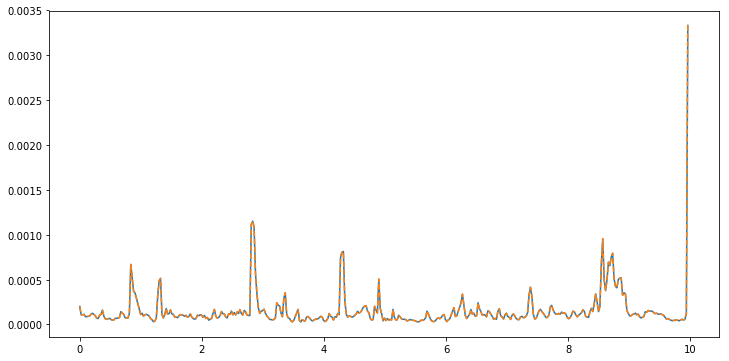

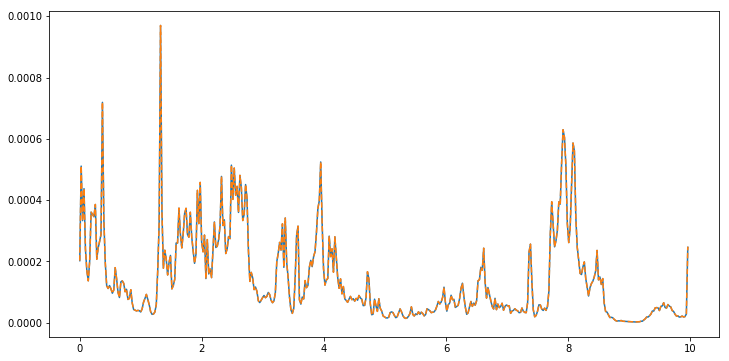

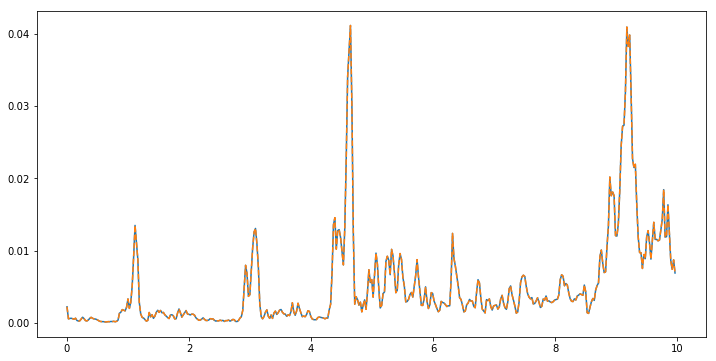

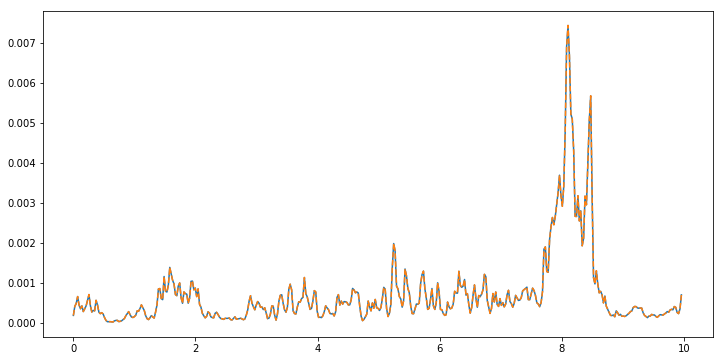

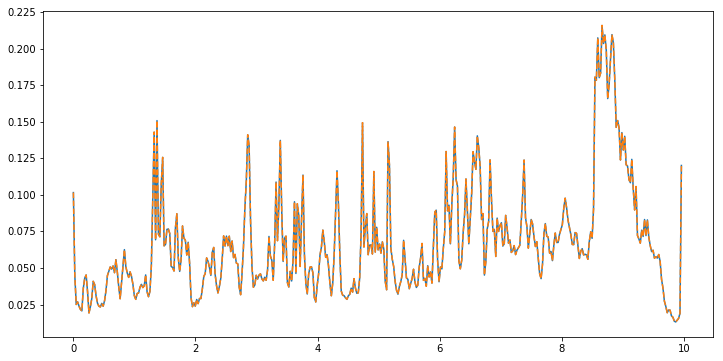

In [45]:
for index in range(17):
    fig = plt.figure(figsize=(12,6))
    plt.plot(np.arange(430) * 1024/44100., pred[:, index])
    plt.plot(np.arange(860) * 512/44100., pred_interp[:, index], '--')

In [8]:
x = pump.layers()['mel/mag']

In [13]:
x.shape[-2].value

128

In [55]:
e = pump['static'].encoder

In [62]:
pump.fields

{'mel/mag': Tensor(shape=(None, 128, 1), dtype=<class 'numpy.float32'>),
 'static/tags': Tensor(shape=(17,), dtype=<class 'bool'>)}

In [63]:
pump.ops

In [65]:
mel = pump.ops[0]

In [66]:
mel.name

'mel'

In [68]:
[o.name for o in pump.ops]

['mel', 'static']

In [69]:
pump['mel']

In [70]:
mel.n_fft

2048

In [71]:
mel.hop_length

1024

In [72]:
pump['mel'].hop_length

1024

In [73]:
pump['mel'].n_fft

2048

In [76]:
pump['mel'].sr

44100.0

In [77]:
pred[-1]

array([  4.61274106e-03,   3.61137232e-03,   8.53161979e-03,
         5.73167065e-03,   5.12165129e-01,   2.60767969e-03,
         8.40333626e-02,   9.32082534e-03,   7.22858235e-02,
         2.16658618e-02,   4.51937281e-02,   1.51143093e-02,
         3.33001558e-03,   2.46125332e-04,   6.92182966e-03,
         7.11808680e-04,   1.20084345e-01], dtype=float32)

In [81]:
pred_interp.reshape(1, pred_interp.shape[0], pred_interp.shape[1]).shape

(1, 860, 17)

In [83]:
np.expand_dims(pred_interp, 0).shape

(1, 860, 17)

In [84]:
pred_interp.shape

(860, 17)

In [90]:
def interpolate_prediction(sample_pred, duration, interp_size):

    pred = sample_pred[0]
    interp = scipy.interpolate.interp1d(
        np.arange(pred.shape[0]) / float(pred.shape[0]) * duration, pred.T,
        kind='linear', bounds_error=False, fill_value=pred[-1])

    pred_interp = interp(np.arange(interp_size) / float(interp_size) * duration).T
    pred_interp = np.expand_dims(pred_interp, 0)

    return pred_interp

In [91]:
output_d.shape

(1, 430, 17)

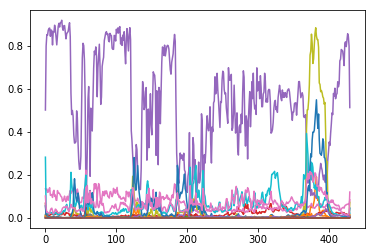

In [92]:
plt.plot(output_d[0]);

In [93]:
interp200 = interpolate_prediction(output_d, 10.0, 200)
interp200.shape

(1, 200, 17)

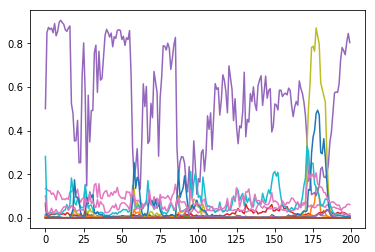

In [94]:
plt.plot(interp200[0]);

In [95]:
interp430 = interpolate_prediction(interp200, 10.0, 430)
interp430.shape

(1, 430, 17)

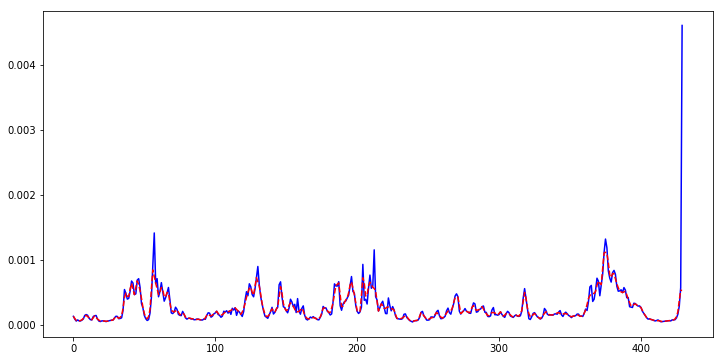

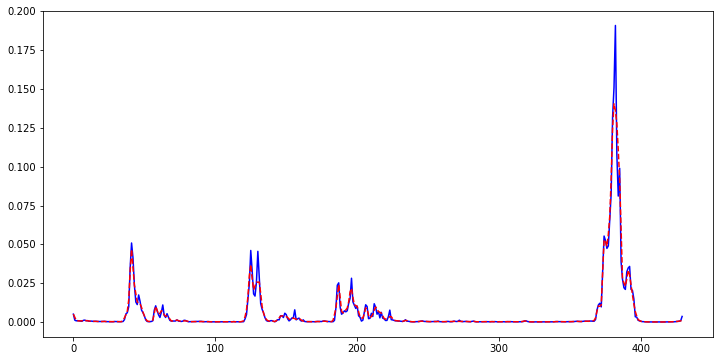

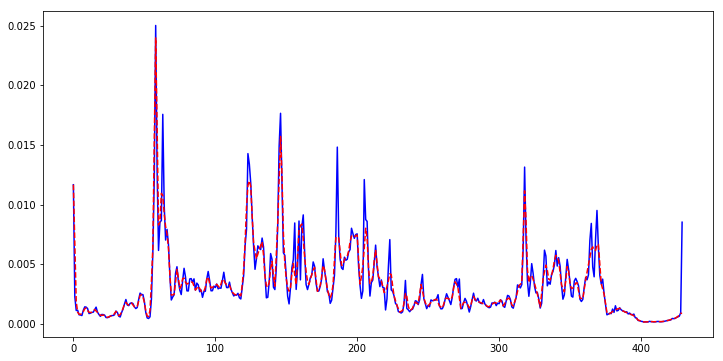

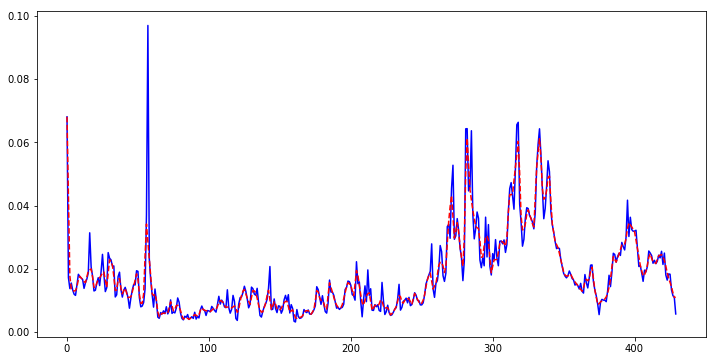

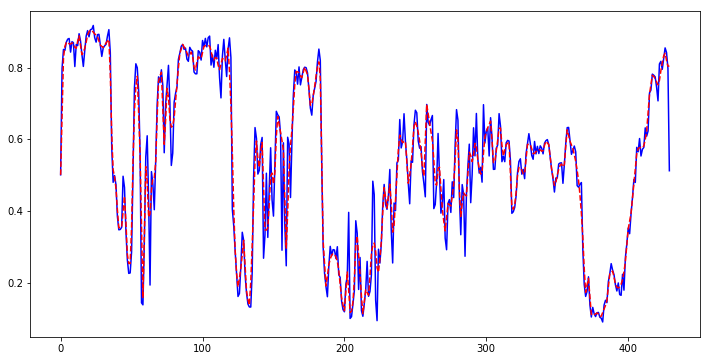

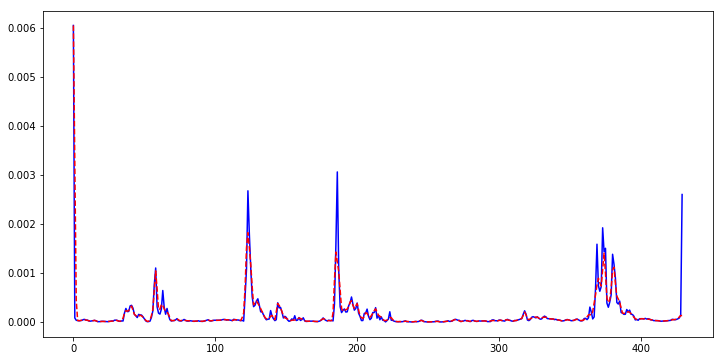

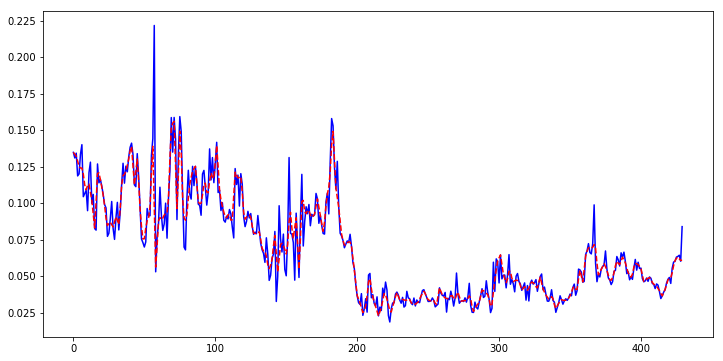

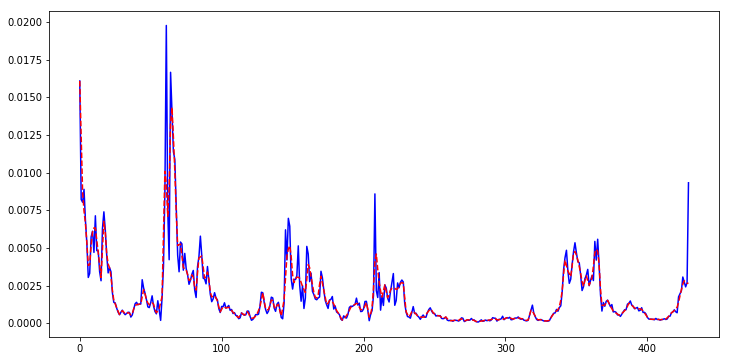

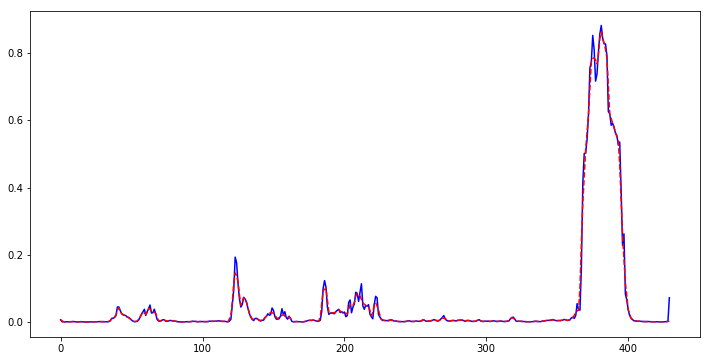

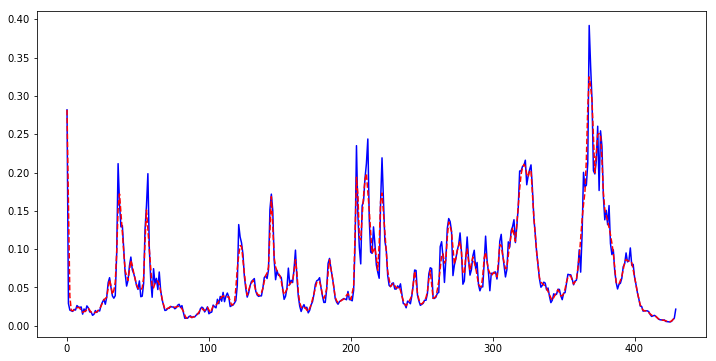

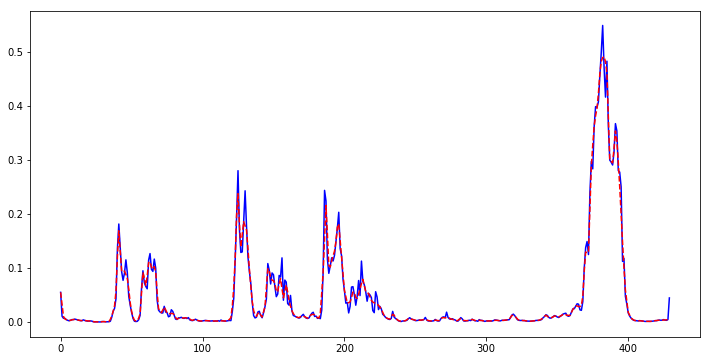

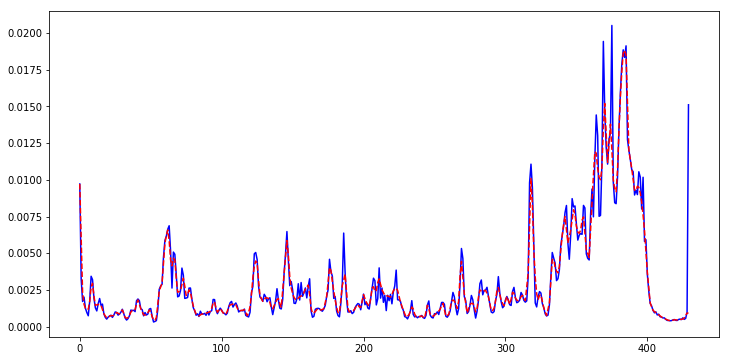

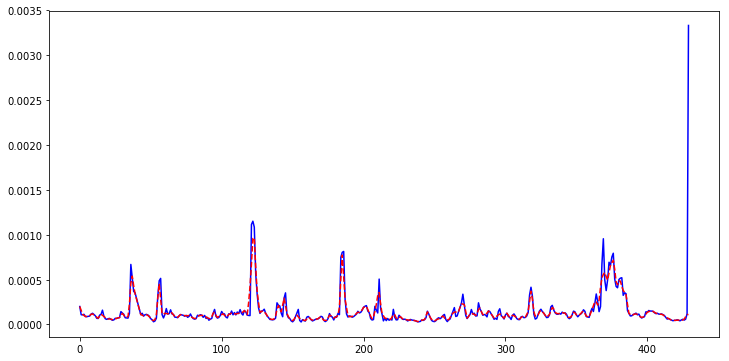

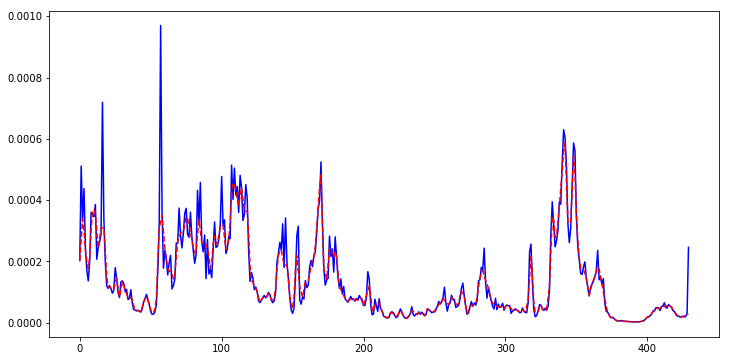

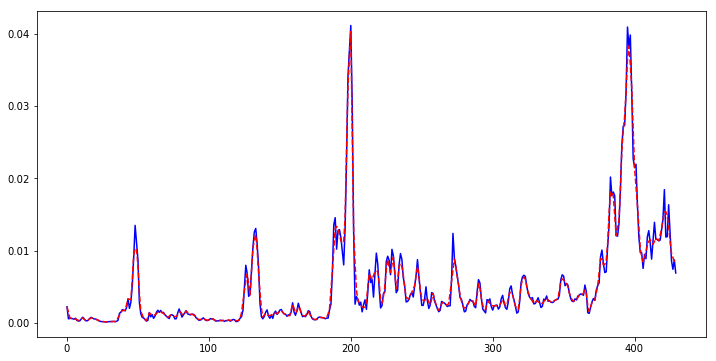

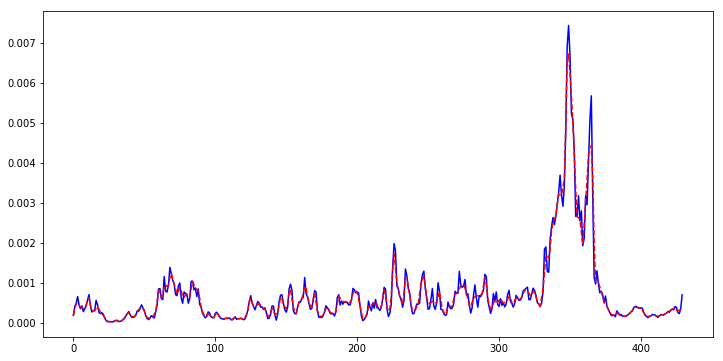

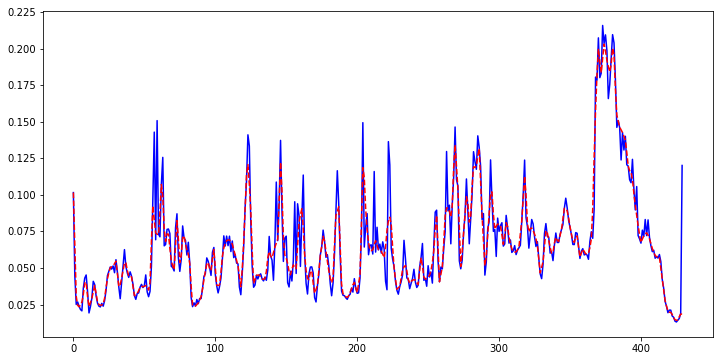

In [97]:
for index in range(17):
    fig = plt.figure(figsize=(12,6))
    plt.plot(output_d[0, :, index], 'b')
    plt.plot(interp430[0, :, index], '--r')

In [ ]:
pump[]